### ВЕКТОРНОЕ ПОЛЕ: КАРТИНКА СО СТРЕЛОЧКАМИ

Следующий код на Питоне позволяет визуализировать графики ФКП (функций комплексного переменного) в виде векторных полей. Каждому числу — точке на комплексной плоскости — ставится в соответствие вектор, отображающий значение функции в этой точке. Цвет вектора (от синего к красному) соответсвует величине модуля функции в точке, от которой он отложен, а направление — её аргументу.

Возможны два формата ввода:

**1. X0 X1 Y0 Y1 D**\
— отображает квадратную область комплексной плоскости в диапазоне \[X0; X1\] вдоль действительной оси и в диапазоне \[Y0; Y1\] вдоль мнимой и размещает на ней векторы (D вдоль меньшей оси, и пропорциональное их число вдоль большей).\
X0, X1, Y0, Y1 ∈ **float**, D ∈ **int**.

**2. B D**\
— отображает квадратную область комплексной плоскости в диапазоне \[-B; B\] вдоль действительной оси и в диапазоне \[-B; B\] вдоль мнимой и размещает на ней D² векторов (D по вертикали и D по горизонтали).\
D ∈ **float**, D ∈ **int**.

\
За отображаемую ФКП отвечает функция **func(x, y)** в начале кода, а именно возвращаемая ею переменная **f**. Чтобы построить график, например, многочлена $f(z) = z^3 - 5z$, между комментариями # COMPUTATIONAL PART BEGINS и # COMPUTATIONAL PART ENDS следует указать:

    f = z ** 3 - 5 * z
Также в целях наглядности рекомендуется соответствующим образом изменять переменную PLOT_NAME, отвечающую за название графика.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Default backend is Qt5Agg?
# But it seems to be somethong else in Jupyter Notebook

"""Никакого особого смысла, просто тестирую импорт"""

class complex:
    def __init__(self, var):
        self.var = var
        
    def convert_complex(self, var):
        self.var = self.var+'+0i'
        
class test(complex):
    def __init__(self, var):
        super().__init__(var)
        self.variables = self.convert_complex(self.var)

    def __str__(self):
        return f"Координаты: {self.var}"
    
#####################################################

    
def func(x, y):
    z = complex(x, y)
    # COMPUTATIONAL PART BEGINS

    f = np.sinh(z)

    # COMPUTATIONAL PART ENDS
    return f.real, f.imag


PLOT_NAME = 'f(z) = sh(z)'


def correct_magnitude(mag):
    # Возвращает скорректированную магнитуду
    # Текущее изменение: отсутствует

    # ЗАПОЛНЕНИЕ ВОЗВРАЩАЕМОЙ МАТРИЦЫ
    nmag = []
    for flvl1 in range(len(mag)):
        nmag.append([])
        for flvl2 in range(len(mag[flvl1])):
            nmag[flvl1].append(mag[flvl1][flvl2])
    return nmag


# ВВОД ДАННЫХ И СОЗДАНИЕ КООРДИНАТНОЙ СЕТКИ
print('input format: min X coord, max X coord, min Y coord, max Y coord, density \
(the number of arrows along the smallest axis)\nOR border coord, density:')
iptlist = input().split()
x0 = float(iptlist[0])
if len(iptlist) > 2:
    x1 = float(iptlist[1])
    y0 = float(iptlist[2])
    y1 = float(iptlist[3])
    density = int(iptlist[4])
else:
    x0 = -x0
    x1 = -x0
    y0 = x0
    y1 = -x0
    density = int(iptlist[1])
mincodi = (abs(x1 - x0) + abs(y1 - y0)) / 2  # stands for Minimum Coordinate Difference
density += 1 - density % 2
xpoints, ypoints = np.meshgrid(np.linspace(x0, x1, density), np.linspace(y0, y1, density))
# # # # # # # # # # # # # # # # # # # # # # #


# СОЗДАНИЕ И НОРМАЛИЗАЦИЯ СТРЕЛОК ВЕКТОРНОГО ПОЛЯ, МАГНИТУДЫ ЦВЕТА
u, v = [], []
for lvl1 in range(len(xpoints)):
    u.append([])
    v.append([])
    for lvl2 in range(len(xpoints[lvl1])):
        fres = func(xpoints[lvl1][lvl2], ypoints[lvl1][lvl2])
        if fres is None:
            u[lvl1].append(0)
            v[lvl1].append(0)
        else:
            u[lvl1].append(fres[0])
            v[lvl1].append(fres[1])
unorm, vnorm, magnitude = [], [], []
for lvl1 in range(len(u)):
    unorm.append([])
    vnorm.append([])
    magnitude.append([])
    for lvl2 in range(len(u[lvl1])):
        magnitude[lvl1].append(np.sqrt(u[lvl1][lvl2]**2 + v[lvl1][lvl2]**2))
        if u[lvl1][lvl2]**2 + v[lvl1][lvl2]**2 > 0:
            unorm[lvl1].append(u[lvl1][lvl2] / np.sqrt(u[lvl1][lvl2]**2 + v[lvl1][lvl2]**2))
            vnorm[lvl1].append(v[lvl1][lvl2] / np.sqrt(u[lvl1][lvl2]**2 + v[lvl1][lvl2]**2))
        else:
            unorm[lvl1].append(0)
            vnorm[lvl1].append(0)
nmagnitude = correct_magnitude(magnitude)
# # # # # # # # # # # # # # # # # # # # # # #


# ОТОБРАЖЕНИЕ ГРАФИКА
plt.figure(PLOT_NAME + f' »»» x({int(x0)} {int(x1)}) » y({int(y0)} {int(y1)}) » d({density})', figsize=(13, 10), dpi=95)
main_plot = plt.quiver(xpoints, ypoints, unorm, vnorm, nmagnitude, cmap=plt.cm.jet, units='xy',
                       width=0.123 * mincodi / density, headlength=3, headwidth=3.1, headaxislength=2.3,
                       edgecolor='red')
plt.colorbar(main_plot)
plt.title(PLOT_NAME + f'     (density={density})')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.tight_layout()
plt.show()
# # # # # # # # # # # # # # # # # # # # # # #


input format: min X coord, max X coord, min Y coord, max Y coord, density (the number of arrows along the smallest axis)
OR border coord, density:


ValueError: could not convert string to float: '-1,'

### ВЕКТОРНОЕ ПОЛЕ: ПОТОК ЧАСТИЦ

Следующий код **на glsl** при вставке его в FieldPlay\* предоставляет функционал для работы с ФКП. Каждому числу — точке на комплексной плоскости — ставится в соответствие вектор скорости, направляющий движение частиц, проходящих через эту точку. Скорость частицы соответствует величине модуля функции в точке, через которую она проходит, а направление её движения — аргументу функции.

\* Непосредственное сохранение этого кода в FieldPlay и последующее открытие, по-видимому, невозможно, из-за того что URL страницы получается слишком длинным.

За отображаемую ФКП отвечает функция **func(complex z)** в конце кода, а именно возвращаемая ею переменная **f**. Однако из-за того, что glsl не знает классов и не поддерживает перегрузку функций/операторов, для совершения любых операций над комплексными числами приходится использовать собственноручно написанные функции. Я добавил в этот код следующие:

**«Конструкторы» комплексных чисел:**\
• complex **alg**(float **x**, float **y**) = **x** + **y**i\
— возвращает комплексное число по его действительной (**x**) и мнимой (**y**) частям\
• complex **trig**(float **r**, float **phi**) = **r**(cos(**phi**) + isin(**phi**))\
— возвращает комплексное число по его модулю (**r**) и аргументу (**phi**)\
В любом комплексном числе **z** в ходе любых операций над ним хранятся все четыре его характеристики: действительная часть (float **z.re**), мнимая часть (float **z.im**), модуль (float **z.mod**) и аргумент (float **z.arg**)

**Элементарные бинарные операции:**\
• complex **Csum**(complex **z1**, complex **z2**) = **z1** + **z2**\
• complex **Cdif**(complex **z1**, complex **z2**) = **z1** - **z2**\
• complex **Cprod**(complex **z1**, complex **z2**) = **z1** \* **z2**\
• complex **Cdiv**(complex **z1**, complex **z2**) = **z1** / **z2**\
• complex **Cpow**(complex **z**, float **p**) = **z**^**p**

**Особые унарные операции над комплексными числами:**\
• complex **Cnorm**(complex **z**) = cos(**z.arg**) + isin(**z.arg**)\
— возвращает **z** нормированное (сохраняет аргумент, меняет модуль на единицу)\
• complex **Cconj**(complex **z**) = **z.re** - **z.im** \* i\
— возвращает комплексно сопряжённое к **z** (сохраняет модуль, меняет знак аргумента)

**Элементарные функции:**\
• complex **Cexp**(complex **z**) = exp(**z**)\
• complex **Csin**(complex **z**) = sin(**z**)\
• complex **Ccos**(complex **z**) = cos(**z**)\
• complex **Ctan**(complex **z**) = tg(**z**)\
• complex **Ccot**(complex **z**) = ctg(**z**)\
• complex **Csinh**(complex **z**) = sh(**z**)\
• complex **Ccosh**(complex **z**) = ch(**z**)\
• complex **Ctanh**(complex **z**) = th(**z**)\
• complex **Ccoth**(complex **z**) = cth(**z**)

**Синтаксический сахар** (для упрощения написания ходовых операций)**:**\
• complex **ci**() = i\
• complex **Cstab**(complex **z**, float **a**) = **a** \* Cnorm(**z**)\
• complex **Cm**(complex **z**) = -**z**\
• complex **Ci**(complex **z**) = i**z**\
• complex **Cmi**(complex **z**) = -i**z**\
• complex **Cn**(float **x**) = **x**\
• complex **Cni**(float **x**) = **x**i\
• complex **Cnm**(float **x**) = -**x**\
• complex **Cnmi**(float **x**) = -**x**i

**Технические функции** (вряд ли пригодятся для ручного использования, но нужны для корректной работы транслятора)**:**\
• complex **CRe**(complex **z**) = **z.re**\
• complex **CIm**(complex **z**) = **z.im**\
• complex **CMod**(complex **z**) = **z.mod**\
• complex **CArg**(complex **z**) = **z.arg**\
• complex **CRpow**(complex **z**, complex **p**) = **z**^**p.re**\
• complex **CRln**(complex **p**) = ln(**p.re**)

Таким образом, чтобы построить график даже простейшего многочлена типа $f(z) = z^3 - 5z$, в функции func(copmlex z) между комментариями // COMPUTATIONAL PART BEGINS и // COMPUTATIONAL PART ENDS следовало бы указать:

    f = Cdif(Cpow(z, 3.), Cprod(Cn(5.), z))

Разумеется, вручную печатать такие нагромождения из бинарных функций — мартышкин труд, особенно для ассоциативных и коммутативных штук типа сложения и умножения. Поэтому я написал программу, которая берёт выражения привычного нам компьютерно-математического формата и переводит в этот дурацкий glsl-комплексно-функциональный (**см. ячейку «транслятор»**).

In [ ]:
float pi = 4. * atan(1.);

float atan2(float y, float x)
{
	if (x > 0.)
		{return atan(y / x);}
	else if (x == 0.)
		{return (pi / 2.) * sign(y);}
	else
		{return atan(y / x) + pi * sign(y);}
}

struct complex
{
	float re;
	float im;
	float mod;
	float arg;
};

complex alg(float x, float y)
{
	complex res;
	res.re = x;
	res.im = y;
	res.mod = sqrt(pow(x, 2.) + pow(y, 2.));
	res.arg = atan2(y, x);
	return res;
}

complex trig(float r, float phi)
{
	complex res;
	res.re = r * cos(phi);
	res.im = r * sin(phi);
	res.mod = r;
	res.arg = phi;
	return res;
}

complex ci()
{
	return alg(0., 1.);
}

complex Cnorm(complex z)
{
	return trig(1., z.arg);
}

complex Cstab(complex z, float a)
{
	return trig(a, z.arg);
}

complex Cconj(complex z)
{
	return alg(z.re, -z.im);
}

complex Cm(complex z)
{
	return alg(-z.re, -z.im);
}

complex Ci(complex z)
{
	return alg(-z.im, z.re);
}

complex Cmi(complex z)
{
	return alg(z.im, -z.re);
}

complex Cn(float x)
{
	return alg(x, 0.);
}

complex Cni(float x)
{
	return alg(0., x);
}

complex Cnm(float x)
{
	return alg(-x, 0.);
}

complex Cnmi(float x)
{
	return alg(0., -x);
}

complex CRe(complex z)
{
	return alg(z.re, 0.);
}

complex CIm(complex z)
{
	return alg(z.im, 0.);
}

complex CMod(complex z)
{
	return alg(z.mod, 0.);
}

complex CArg(complex z)
{
	return alg(z.arg, 0.);
}

complex Csum(complex z1, complex z2)
{
	float sum_re = z1.re + z2.re;
	float sum_im = z1.im + z2.im;
	return alg(sum_re, sum_im);
}

complex Cdif(complex z1, complex z2)
{
	float dif_re = z1.re - z2.re;
	float dif_im = z1.im - z2.im;
	return alg(dif_re, dif_im);
}

complex Cprod(complex z1, complex z2)
{
	float prod_mod = z1.mod * z2.mod;
	float prod_arg = z1.arg + z2.arg;
	return trig(prod_mod, prod_arg);
}

complex Cdiv(complex z1, complex z2)
{
	float div_mod = z1.mod / z2.mod;
	float div_arg = z1.arg - z2.arg;
	return trig(div_mod, div_arg);
}

complex Cpow(complex z, float p)
{
	float pow_mod = pow(z.mod, p);
	float pow_arg = z.arg * p;
	return trig(pow_mod, pow_arg);
}

complex CRpow(complex z, complex p)
{
	float pow_mod = pow(z.mod, p.re);
	float pow_arg = z.arg * p.re;
	return trig(pow_mod, pow_arg);
}

complex CRln(complex p)
{
	return alg(log(p.re), 0.);
}

complex Cexp(complex z)
{
	float exp_mod = exp(z.re);
	float exp_arg = z.im;
	return trig(exp_mod, exp_arg);
}

complex Csin(complex z)
{
	complex eiz = Cexp(Ci(z));
	complex emiz = Cexp(Cmi(z));
	return Cdiv(Cdif(eiz, emiz), alg(0., 2.));
}

complex Ccos(complex z)
{
	complex eiz = Cexp(Ci(z));
	complex emiz = Cexp(Cmi(z));
	return Cdiv(Csum(eiz, emiz), alg(2., 0.));
}

complex Ctan(complex z)
{
	return Cdiv(Csin(z), Ccos(z));
}

complex Ccot(complex z)
{
	return Cdiv(Ccos(z), Csin(z));
}

complex Csinh(complex z)
{
	complex ez = Cexp(z);
	complex emz = Cexp(Cm(z));
	return Cdiv(Cdif(ez, emz), alg(2., 0.));
}

complex Ccosh(complex z)
{
	complex ez = Cexp(z);
	complex emz = Cexp(Cm(z));
	return Cdiv(Csum(ez, emz), alg(2., 0.));
}

complex Ctanh(complex z)
{
	return Cdiv(Csinh(z), Ccosh(z));
}

complex Ccoth(complex z)
{
	return Cdiv(Ccosh(z), Csinh(z));
}

complex func(complex z)
{
	complex f = z;
	// COMPUTATIONAL PART BEGINS
	
	
	
	// COMPUTATIONAL PART ENDS
	return f;
}

vec2 get_velocity(vec2 p) {
	vec2 v = vec2(0., 0.);
	float x = p.x;
	float y = p.y;
	
	complex z = alg(x, y);
	complex fz = func(z);
	
	v.x = fz.re;
	v.y = fz.im;

	return v;
}

SyntaxError: invalid syntax (429690940.py, line 1)

### ТРАНСЛЯТОР

Следующий код на Питоне, как уже было замечено ранее, «берёт выражения привычного нам компьютерно-математического формата и переводит в этот дурацкий glsl-комплексно-функциональный», причём под «привычным математическим форматом» подразумеваются выражения, допускающие следующие особенности:\
• Слитное написание интерпретируется как умножение: 2iz = 2\*i\*z\
• Сохраняется стандартный приоритет выполнения операций: 3i+2^5^3\*4 = (3\*i)+((2^(5^3))\*4)\
• Допускается любое количество пробелов и прочих декоративных символов между частями выражений: z^2 + 5 = (z^2)+5\
• ! Каждая буква расценивается как отдельная переменная: ab = a\*b\
• Ну, кроме составляющих названия функций, после которых идут скобки, заключающие в себя аргумент: exp(z) = exp(z)

Транслятор не проверяет ввод на правильность расстановки скобок, операторов, etc., **мне лень было это добавлять!** Но зато он непосредственно перед glsl-записью также выводит программную интерпретацию введённого выражения, чтобы можно было вручную чекнуть, правильно ли всё обработалось. 

Список названий доступных функций занесён в переменную FUNCTIONS в начале кода. Также актуальны цифры 0-9, точка . для десятичных дробей, знаки стандартных арифметических операций +-\*/^ и буквы английского алфавита (строчные и заглавные). Все прочие символы игнорируются.

In [ ]:
FUNCTIONS = ('exp', 'ln', 'sin', 'cos', 'tan', 'tg', 'cot', 'ctg',
             'sinh', 'sh', 'cosh', 'ch', 'tanh', 'th', 'coth', 'cth',
             'minus', 'norm', 'conj', 'Re', 'Im', 'Mod', 'Arg')
FUNC_NAME = {'exp': 'Cexp', 'ln': 'CRln', 'sin': 'Csin', 'cos': 'Ccos', 'tan': 'Ctan', 'tg': 'Ctan',
             'cot': 'Ccot', 'ctg': 'Ccot', 'sinh': 'Csinh', 'sh': 'Csinh', 'cosh': 'Ccosh', 'ch': 'Ccosh',
             'tanh': 'Ctanh', 'th': 'Ctanh', 'coth': 'Ccoth', 'cth': 'Ccoth', 'norm': 'Cnorm', 'minus': 'Cm',
             'conj': 'Cconj', 'Re': 'CRe', 'Im': 'CIm', 'Mod': 'CMod', 'Arg': 'CArg'}
OPER_NAME = {'+': 'Csum', '-': 'Cdif', '*': 'Cprod', '/': 'Cdiv', '^': 'CRpow'}


def interprete(request):
    # # # READING AND INTERPRETING THE EXPRESSION

    split = []
    chain = [split]
    stage = chain[0]
    temp_num = ''
    temp_func = ''

    for symb in request:
        if symb in '0123456789.':
            temp_num += symb
        elif temp_num != '':
            if '.' not in temp_num:
                temp_num += '.'
            stage.append(f'Cn({temp_num})')
            stage.append('*')
            temp_num = ''

        if symb in 'qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM':
            temp_func += symb
        elif temp_func != '':
            if temp_func in FUNCTIONS:
                stage.append(temp_func)
                temp_func = ''
            for letter in temp_func:
                if letter == 'i':
                    stage.append('ci()')
                else:
                    stage.append(letter)
                stage.append('*')
            temp_func = ''

        if symb in '+-*/^':
            try:
                if stage[-1] == '*':
                    stage.pop()
            except:
                pass
            stage.append(symb)

        if symb == '(' or symb == '[':
            stage.append([])
            stage = stage[-1]
            chain.append(stage)
        if symb == ')' or symb == ']':
            try:
                if stage[-1] == '*':
                    stage.pop()
            except:
                pass
            chain.pop()
            stage = chain[-1]
            stage.append('*')
    if split[-1] == '*':
        split.pop()
    return split


def cell_type(cell):
    if cell in '+-*/^':
        return 'O'
    elif cell in FUNCTIONS:
        return 'F'
    else:
        return 'V'


def evaluate(request):
    # # # PROCESSING THE EXPRESSION

    res = ''
    if isinstance(request, str):
        return request
    if request[0] == '-':
        request[0] = 'minus'

    # SEARCH FOR FUNCTIONS
    idx = 0
    while idx < len(request):
        request[idx] = evaluate(request[idx])
        if cell_type(request[idx]) == 'F':
            request[idx + 1] = evaluate(request[idx + 1])
            request[idx] = f'{FUNC_NAME[request[idx]]}({request[idx + 1]})'
            request.pop(idx + 1)
        idx += 1

    # SEARCH FOR ^
    idx = len(request) - 1
    while idx >= 0:
        if request[idx] == '^':
            request[idx] = f'{OPER_NAME["^"]}({request[idx - 1]},{request[idx + 1]})'
            request.pop(idx + 1)
            request.pop(idx - 1)
            idx -= 1
        idx -= 1

    # SEARCH FOR */
    idx = 0
    while idx < len(request):
        if request[idx] in '*/':
            request[idx] = f'{OPER_NAME[request[idx]]}({request[idx - 1]},{request[idx + 1]})'
            request.pop(idx + 1)
            request.pop(idx - 1)
            idx -= 1
        idx += 1

    # SEARCH FOR +-
    idx = 0
    while idx < len(request):
        if request[idx] in '+-':
            request[idx] = f'{OPER_NAME[request[idx]]}({request[idx - 1]},{request[idx + 1]})'
            request.pop(idx + 1)
            request.pop(idx - 1)
            idx -= 1
        idx += 1

    return request[0]


print('Input a math expression:')
expression = input() + ' '

math_expression = interprete(expression)
print(math_expression)
print(evaluate(math_expression) + ';')


Input a math expression:


### И ЕЩЁ ПАРА СЛОВ О FIELDPLAY

Помимо функции редактирования кода, в FieldPlay есть несколько «заводских» настроек, которые можно подкручивать, чтобы получать график в более удобоваримом в данный момент виде:

• **Particle color** — цвет частиц. В случае с графиками ФКП я рекомендую выбирать именно вариант раскраски по углу, под которым движется частица (*Angle*). Связана рекомендация, во-первых, с тем, что в таком формате проще отслеживать закономерности распределения *аргумента* функции на комплексной плоскости, а во-вторых, с тем, что многие стандартные программы отрисовки комплекснозначных функций используют для отображения аргумента именно цвет, а не стрелки или летающие частицы:\
https://talbrenev.com/complexgrapher/ \
Вариант *Velocity* тоже мог бы быть полезным для наглядной демонстрации распределения *модуля* функции, но почему-то у меня он с комплексными никогда нормально не работал :с

• **Particles count** — число частиц. Чем больше, тем проще тебе и тяжелее компу. Но обычно порядка 8000 с лихвой хватает, а автор филдплея использует какой-то хитрый способ максимальной оптимизации, так что должно обойтись без проблем.

• **Fade out speed** — то, как долго за движущейся частицей остаётся её след. Параметр очень редко нуждается в изменении, но если хочешь красивые длинные хвостики, то подкрути ползунок вверх, а если тебя интересует набор колбасящихся точек, то вниз.

• **Particle reset probability** — наблюдая за графиками комплексных функций (да и вообще за векторными полями), ты заметишь, что на многих из них есть «источники» — точки, которые отталкивают от себя все частицы, — и «стоки» — места, к которым все частицы притягиваются. Если бы мы просто забросили на график 8000 частиц и оставили их в покое, то рано или поздно они все стянулись бы к «стокам», и график бы закончился. Поэтому частицы периодически нужно обновлять: убирать из одного места и помещать в другое случайное. Соответственно, чем выше particle reset probability, тем чаще происходит particle reset и тем более равномерно частицы в каждый момент времени оказываются распределены по рисунку.\
**!!!** Также с помощью этого параметра можно обновить все частицы на экране, если они у тебя вдруг куда-то разлетелись: заменить значение на 1, а затем назать ctrl+z.

• **Integration timestep** — читай: «скорость частиц». Чем выше, тем быстрее всё движется. Очень полезный параметр, если хочешь рассмотреть график на разных масштабах, т.к. скорость в программе измеряется *в абсолютных величинах* (в единицах координатной сетки), и то, что при хорошем приближении кажется очень быстро движущимся, при удалении, наоборот, станет медленным. Ну, потому что за одно и то же время все частицы будут проходить одно и то же абсолютное расстояние, просто это расстояние будет занимать разное количество места на экране.

Если скорость на каких-то участках графика слишком большая получится, частицы могут слетать со своих траекторий и колбаситься непонятно как. Или если слишком маленькая, то они просто стоят примерно на одном месте и почти никуда не перемещаются. Особенно это актуально для функций, у которых модуль изменяется быстрее, чем примерно третья степень переменной: скажем, z^4 или exp(z). Но ты не пугайся — если с отображением модуля возникают проблемы, всегда можно в func(complex z) дописать строчку о нормировании её значения:

    f = Cnorm(f);

И наслаждаться чистым графиком распределения аргумента. Более того, если хочется всё-таки получить хоть какое-то представление о скоростях, можно даже извратиться и написать строки в духе:

    if (f.mod < 1)
        {f.mod = 1;}
    if (f.mod > 10)
        {f.mod = 10;}

Разгоняющие слишком медленные частицы до скорости 1 и тормозящие слишком быстрые до скорости 10.

### СРАВНИТЕЛЬНЫЙ АНАЛИЗ ВЕКТОРНОГО ГРАФИКА И FIELDPLAY

##### <<<<< Векторный график >>>>>

**Достоинства:**\
• Большой набор математических функций, доступных в numpy.\
• Крайне наглядное отображение аргумента функции направлением вектора.\
• Относительно наглядное отображение её модуля цветом вектора.

**Недостатки:**\
• Отображение модуля недостаточно чувствительно: из-за присутствия на плоскости всего лишь нескольких больших его значений все маленькие окрашиваются в синий и визуально становятся друг от друга практически неотличимы (или наоборот). Это делает невозможным анализ малых изменений модуля по графику.\
• Дискретность: график не даёт информации о значениях функции между точками, от которых отложены векторы, из-за чего её поведение в малых областях вокруг особых точек (например, корней) может быть неочевидным.\
• В бэкенде Jupyter отсутствует возможность взаимодействовать с графиком. В бэкенде PyCharm эти возможности ограничиваются двиганием и приближением/отдалением картинки, не дающим новой информации (ни количество векторов, ни их абсолютные размеры не меняются).

##### <<<<< FieldPlay >>>>>

**Достоинства:**\
• Исключительно наглядное и подробное отображение аргумента функции во всех точках плоскости при помощи потока частиц.\
• Контактный график: удобное, интуитивно понятное приближение/отдаление графика и перемещение по нему прямо в процессе непрерывной отрисовки.\
• *Это безумно красиво.*

**Недостатки:**\
• Нет встроенной математической бибиотеки для работы с комплексными числами. И если что-то типа экспоненты ещё можно написать самому, приложив относительно немного усилий, то вот мороки с кустарной Римановой Зетой будет...\
• Не даёт практически никакой информации о распределении модуля функции. Окраска *Velocity* не работает, скорость частиц в разных областях рисунка человеческий глаз может сравнить лишь приблизительно, на разных масштабах она выглядит по-разному, и это не говоря уже о том, что никаких абсолютных значений вообще нигде нет.

##### <<<<< Вывод >>>>>

• До тех пор пока тебе не понадобилось построить что-то типа Римановой Зеты, в 99% случаев отображение через FieldPlay будет проще, нагляднее и красивее.\
• Оба варианта сильно проигрывают в наглядности отображения *модуля* комплекснозначных функций. Так что нужно написать программу, которая будет адекватно строить именно графики модулей как трёхмерных поверхностей (Wolfram не предлагай, он из рук вон плохо справляется). В идеале — раскрашенных под цвет аргумента. Ну или не написать, а спиратить откуда-нибудь что-то типа Matlab-а... какие же все эти математические программы дорогие, мерзость просто. Тяжело быть саентистом(

UPD: Я написал...

### ТРЁХМЕРНЫЙ ГРАФИК: РАСКРАШЕННАЯ ПОВЕРХНОСТЬ

Инструкцию написать уже не успеваю, но эта штука предназначена именно для того, чтобы изучать поведение модуля комплекснозначных функций. Ввод работает по тому же принципу, что и у векторного поля со стрелочками. Разберёшься XDD

P.S. Лучше скопируй эту штуку в PyCharm или найди, как здесь поставить другой бэкенд. Трёхмерные графики никому не нужны, если их нельзя повертеть.

For any input, print - to set the corresponding value to default.
Coordinates of the edges of XY rendering: x₀ x₁ y₀ y₁ OR b (default is 5):
-
Maximal |f(z)| value to display (default is max(f(x + yi)) for x∈[x₀;x₁], y∈[y₀;y₁]):
-
Radial truncation (0 or 1, default is 0 means no):
-
Argument truncation (two float numbers ∈ (-1; 1] corresponding to (-π; π], default is no truncation):
-
Density (distance between any two closest points at which f(z) is computed)
(default is max(x₁ - x₀, y₁ - y₀) / 100):
-


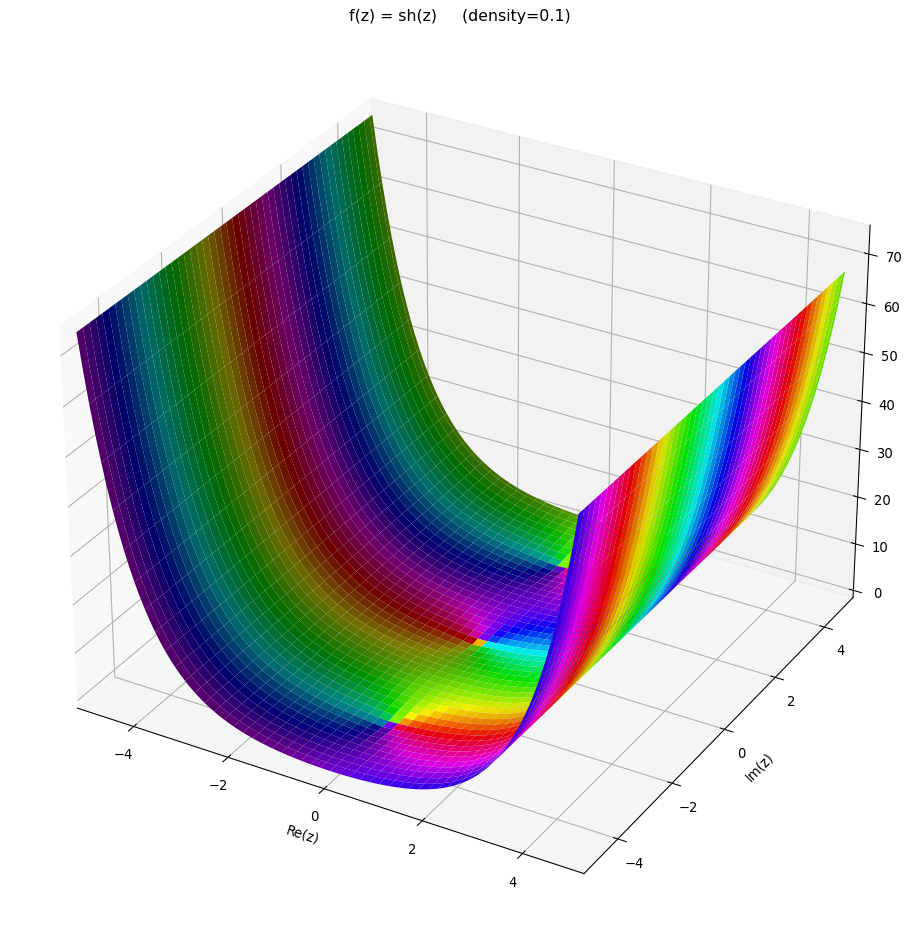

In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import colorsys


def func(x, y):
    z = complex(x, y)
    # COMPUTATIONAL PART BEGINS
    
    f = np.sinh(z)
    
    # COMPUTATIONAL PART ENDS
    return f.real, f.imag


PLOT_NAME = 'f(z) = sh(z)'

# Input the variables
print('For any input, print - to set the corresponding value to default.')
print('Coordinates of the edges of XY rendering: x₀ x₁ y₀ y₁ OR b (default is 5):')
render_edges = input().split()
if len(render_edges) == 4:
    x0 = float(render_edges[0])
    x1 = float(render_edges[1])
    y0 = float(render_edges[2])
    y1 = float(render_edges[3])
elif render_edges[0] == '-':
    x0 = -5.
    x1 = 5.
    y0 = -5.
    y1 = 5.
else:
    x0 = -float(render_edges[0])
    x1 = float(render_edges[0])
    y0 = -float(render_edges[0])
    y1 = float(render_edges[0])

print('Maximal |f(z)| value to display (default is max(f(x + yi)) for x∈[x₀;x₁], y∈[y₀;y₁]):')
fzmax = input()
if fzmax != '-':
    fzmax = float(fzmax)
    search_for_max = False
else:
    fzmax = 0.
    search_for_max = True

print('Radial truncation (0 or 1, default is 0 means no truncation):')
user_radial_truncation = input()
center_x = (x0 + x1) / 2
center_y = (y0 + y1) / 2
dist_x = (x1 - x0) / 2
dist_y = (y1 - y0) / 2
if user_radial_truncation == '1':
    radial_trunc = True
else:
    radial_trunc = False

print('Argument truncation (two float numbers ∈ (-1; 1] corresponding to (-π; π], default is no truncation):')
user_argument_truncation = input().split()
if len(user_argument_truncation) == 2:
    arg_trunc = True
    arg_trunc1 = float(user_argument_truncation[0]) * np.pi
    arg_trunc2 = float(user_argument_truncation[1]) * np.pi
else:
    arg_trunc = False
    arg_trunc1 = 0
    arg_trunc2 = 0

print('Density (distance between any two closest points at which f(z) is computed)\n'
      '(default is max(x₁ - x₀, y₁ - y₀) / 100):')
user_density = input()
if user_density != '-':
    density = float(user_density)
else:
    density = min(x1 - x0, y1 - y0) / 100

# Render the plot
fig = plt.figure(PLOT_NAME + f' »»» x({int(x0)} {int(x1)}) » y({int(y0)} {int(y1)}) » d({density})',
                 figsize=(13, 10), dpi=95)
ax = fig.gca(projection='3d')

# Prepare axes
X = np.arange(x0, x1, density)
Y = np.arange(y0, y1, density)
X, Y = np.meshgrid(X, Y)

# Get function values
FUNC_RE = X.copy()
FUNC_IM = X.copy()
for lvl1 in range(len(X)):
    for lvl2 in range(len(X[0])):
        c_x = X[lvl1][lvl2]
        c_y = Y[lvl1][lvl2]
        c_func = func(c_x, c_y)
        FUNC_RE[lvl1][lvl2] = c_func[0]
        FUNC_IM[lvl1][lvl2] = c_func[1]
# print(FUNC_RE)
# print(FUNC_IM)

# Get Z values
Z = X.copy()
for lvl1 in range(len(X)):
    for lvl2 in range(len(X[0])):
        c_re = FUNC_RE[lvl1][lvl2]
        c_im = FUNC_IM[lvl1][lvl2]
        c_mod = np.sqrt(np.power(c_re, 2) + np.power(c_im, 2))
        Z[lvl1][lvl2] = c_mod
        if search_for_max and c_mod > fzmax:
            fzmax = c_mod

# for elem in Z:
#     print(elem)

# Get arg coloring
CL = []
for lvl1 in range(len(X)):
    CL.append([])
    for lvl2 in range(len(X[0])):
        c_x = X[lvl1][lvl2]
        c_y = Y[lvl1][lvl2]
        c_re = FUNC_RE[lvl1][lvl2]
        c_im = FUNC_IM[lvl1][lvl2]
        c_arg = np.arctan2(c_im, c_re)
        c_xyarg = np.arctan2(c_y, c_x)
        c_mod = np.sqrt(np.power(c_re, 2) + np.power(c_im, 2))
        if (radial_trunc and (((c_x - center_x) / dist_x) ** 2 + ((c_y - center_y) / dist_y) ** 2 > 1)) \
                or (arg_trunc and arg_trunc1 <= c_xyarg <= arg_trunc2)\
                or (c_mod > fzmax):
            CL[lvl1].append((0, 0, 0, 0,))
        else:
            c_color = colorsys.hsv_to_rgb((c_arg + np.pi + 10 ** (-5)) / 2 / np.pi, 1, 1)
            CL[lvl1].append(c_color)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, facecolors=CL,
                       linewidth=0, antialiased=True)

# Customize the axes
ax.set_xlim(x0, x1)
ax.set_ylim(y0, y1)
ax.set_zlim(0, fzmax)

ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.title(PLOT_NAME + f'     (density={density})')
plt.tight_layout()
plt.show()
